In [178]:
import pandas as pd
from data_preprocess import create_sequences, getdata
from sklearn.preprocessing import MinMaxScaler
from model import getLSTM
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# np.random.seed(42)
# tf.random.set_seed(42)

def train(X,y,model):
    
    # Train the model
    model.fit(X, y, epochs=50, batch_size=32)

    # Evaluate the model
    train_loss = model.evaluate(X, y, verbose=0)
    #test_loss = model.evaluate(X_test, y_test, verbose=0)
    print(f'Train Loss: {train_loss:.6f}')
    return model
    #print(f'Test Loss: {test_loss:.6f}')
def test(X,y,model):
    test_loss = model.evaluate(X, y, verbose=0)
    print(f'Test Loss: {test_loss:.6f}')
    
    

In [179]:
X,y,scaler=getdata('./yfinance_2020-2024_day.csv')
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size],y[:train_size]
X_test, y_test = X[train_size:],y[train_size:]
model=getLSTM((X_train.shape[1], X_train.shape[2]))
model.compile(optimizer='adam', loss='mean_squared_error')
# model=train(X_train,y_train,model)
# test(X_test,y_test,model)

# Set up EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split and early stopping
history = model.fit(
    X_train, y_train,
    epochs=500,
    batch_size=32,
    validation_split=0.2,  # 20% of the training data for validation
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on test data
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.6f}')
print(f'Test Loss: {test_loss:.6f}')
best_epoch = len(history.history['loss'])
print(f"The best epoch was: {best_epoch}")
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
# print(X_train[0:5])

Epoch 1/500


C:\Users\15596\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.1273 - val_loss: 0.0066
Epoch 2/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 3/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 4/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 5/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 7/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 9/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 10/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 11/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 12/500
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0011 - val_l

In [180]:
print(X_test[0])
print(y_test[0])

[[0.69398133]
 [0.67475838]
 [0.6673649 ]
 [0.66835069]
 [0.68834831]
 [0.68377134]
 [0.69876953]
 [0.68736252]
 [0.67919449]
 [0.650536  ]
 [0.65356385]
 [0.65701406]
 [0.63807282]
 [0.64659284]
 [0.64300177]
 [0.62821482]
 [0.63243969]
 [0.66849155]
 [0.68820745]
 [0.67250519]
 [0.68144767]
 [0.66539332]
 [0.65067685]
 [0.66454839]
 [0.67947609]
 [0.68229271]
 [0.70243108]
 [0.69644586]
 [0.71334514]
 [0.72658298]]
0.7163729944551881


In [181]:
train_predictions_unscaled = scaler.inverse_transform(train_predictions)
y_train = y_train.reshape(-1, 1)
y_train_unscaled = scaler.inverse_transform(y_train)
test_predictions_unscaled = scaler.inverse_transform(test_predictions)
y_test = y_test.reshape(-1, 1)
y_test_unscaled = scaler.inverse_transform(y_test)
# Calculate MAPE for train and test sets
train_mape = np.mean(np.abs((y_train_unscaled - train_predictions_unscaled) / y_train_unscaled)) * 100
test_mape = np.mean(np.abs((y_test_unscaled - test_predictions_unscaled) / y_test_unscaled)) * 100

print(f"Train MAPE: {train_mape:.2f}%")
print(f"Test MAPE: {test_mape:.2f}%")

Train MAPE: 1.65%
Test MAPE: 0.92%


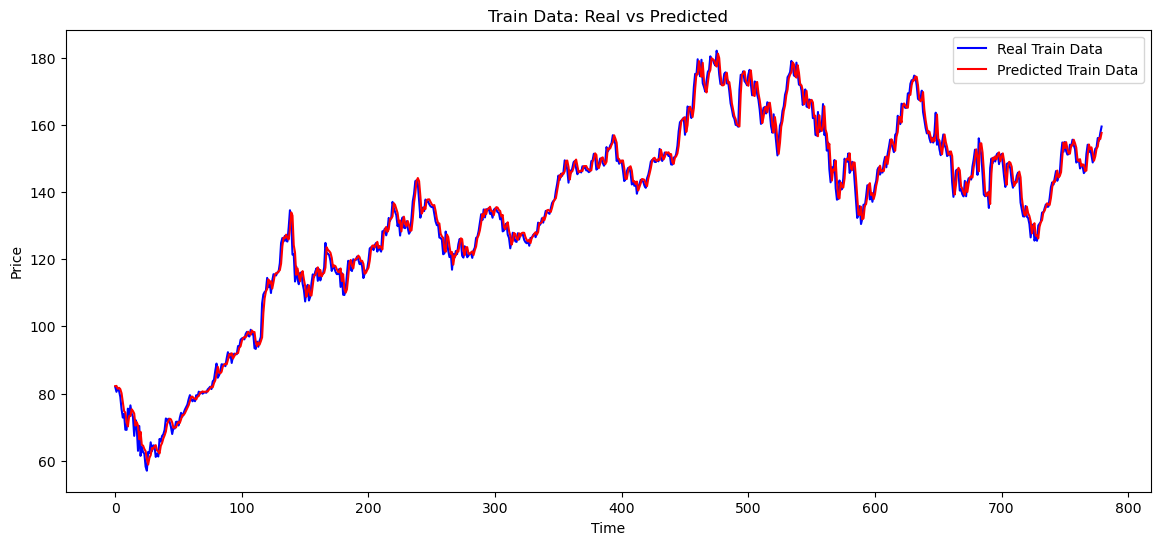

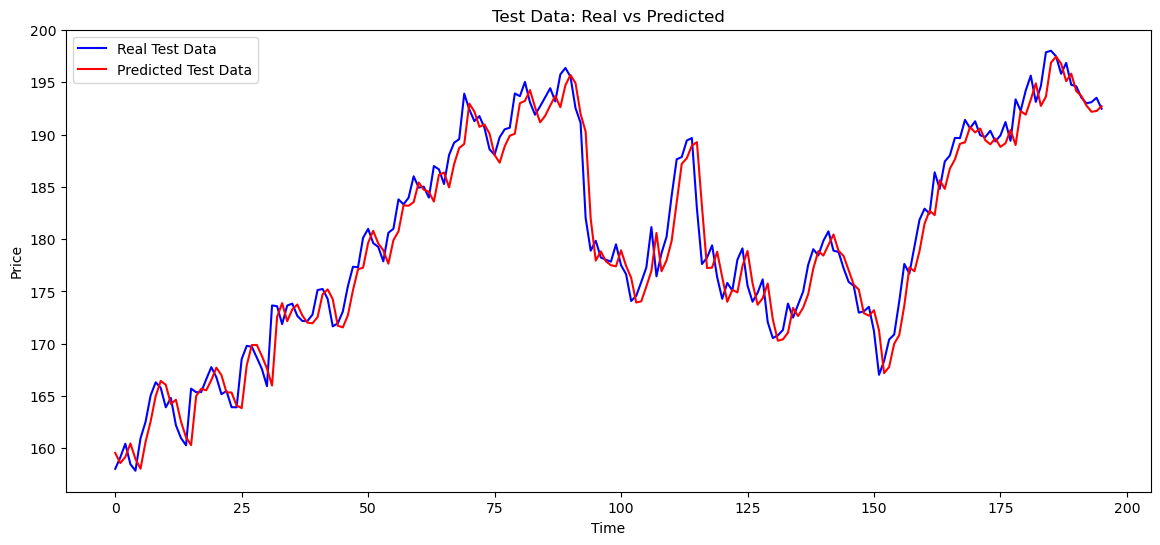

In [182]:
import matplotlib.pyplot as plt

# 假设 train_predictions、y_train_unscaled、test_predictions、y_test_unscaled 已经正确反归一化

# 绘制训练数据的预测值和真实值
plt.figure(figsize=(14, 6))
plt.plot(y_train_unscaled, label="Real Train Data", color="blue")
plt.plot(train_predictions_unscaled, label="Predicted Train Data", color="red")
plt.title("Train Data: Real vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# 绘制测试数据的预测值和真实值
plt.figure(figsize=(14, 6))
plt.plot(y_test_unscaled, label="Real Test Data", color="blue")
plt.plot(test_predictions_unscaled, label="Predicted Test Data", color="red")
plt.title("Test Data: Real vs Predicted")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [183]:
model.save('model.h5')

In [184]:
original_data = pd.read_csv('yfinance_2020-2024_day.csv', usecols=['Date'])
original_data['Date'] = pd.to_datetime(original_data['Date'])

# 3. 将预测结果与日期配对，假设 train_predictions 是您的预测结果
predictions_df = pd.DataFrame({
    'Date': original_data['Date'][-len(y_test_unscaled):],  # 使用原始数据中的日期
    'Predicted_Close': y_test_unscaled.flatten()  # 确保预测结果是一维
})

# 4. 保存为 CSV 文件
predictions_df.to_csv('predictions_with_dates.csv', index=False)